# 1. Examine generated jets

In [1]:
import numpy as np
from tensorclass import TensorMultiModal
from datamodules.utils import JetFeatures
import matplotlib.pyplot as plt
from utils import EnergyCorrelationFunctions, plot_hist_and_ratio

def get_flavors(path):

    gen = path.clone()
    gen.discrete[gen.mask==0] = -1

    gen_photons = gen.clone()
    gen_photons.apply_mask(gen_photons.discrete == 0)
    gen_photons.mask *= gen_photons.discrete == 0
    gen_photons = JetFeatures(gen_photons)

    gen_neutral_hadrons = gen.clone()
    gen_neutral_hadrons.apply_mask(gen_neutral_hadrons.discrete == 1)
    gen_neutral_hadrons.mask *= gen_neutral_hadrons.discrete == 1
    gen_neutral_hadrons = JetFeatures(gen_neutral_hadrons)

    gen_neg_hadrons = gen.clone()
    gen_neg_hadrons.apply_mask((gen_neg_hadrons.discrete == 2))
    gen_neg_hadrons.mask *= gen_neg_hadrons.discrete == 2
    gen_neg_hadrons = JetFeatures(gen_neg_hadrons)

    gen_pos_hadrons = gen.clone()
    gen_pos_hadrons.apply_mask((gen_pos_hadrons.discrete==3))
    gen_pos_hadrons.mask *= gen_pos_hadrons.discrete == 3
    gen_pos_hadrons = JetFeatures(gen_pos_hadrons)

    gen_electron = gen.clone()
    gen_electron.apply_mask(gen_electron.discrete==4)
    gen_electron.mask *= gen_electron.discrete == 4
    gen_electron = JetFeatures(gen_electron)

    gen_positron = gen.clone()
    gen_positron.apply_mask(gen_positron.discrete==5)
    gen_positron.mask *= gen_positron.discrete == 5
    gen_positron = JetFeatures(gen_positron)

    gen_muon = gen.clone()
    gen_muon.apply_mask(gen_muon.discrete==6)
    gen_muon.mask *= gen_muon.discrete == 6
    gen_muon = JetFeatures(gen_muon)

    gen_antimuon = gen.clone()
    gen_antimuon.apply_mask(gen_antimuon.discrete==7)
    gen_antimuon.mask *= gen_antimuon.discrete == 7
    gen_antimuon = JetFeatures(gen_antimuon)

    return (gen_photons, gen_neutral_hadrons, 
            gen_neg_hadrons, gen_pos_hadrons, 
            gen_electron, gen_positron, 
            gen_muon, gen_antimuon)


In [5]:
dir_path = "/home/df630/Multimodal-Bridges/experiments/results/comet/multimodal-jets/"

# test = TensorMultiModal.load_from(dir_path + "/data/test_sample.h5")
# paths_cfm = TensorMultiModal.load_from(dir_path + "/data/paths_sample.h5")
paths_mjb = TensorMultiModal.load_from(dir_path + "/nursing_broth_2167/paths_sample.h5")

In [6]:
# photons_cfm, neutral_hadrons_cfm, neg_hadrons_cfm, pos_hadrons_cfm, electron_cfm, positron_cfm, muon_cfm, antimuon_cfm = get_flavors(paths_cfm[-1])
photons_mjb, neutral_hadrons_mjb, neg_hadrons_mjb, pos_hadrons_mjb, electron_mjb, positron_mjb, muon_mjb, antimuon_mjb = get_flavors(paths_mjb[-1])
# photons_test, neutral_hadrons_test, neg_hadrons_test, pos_hadrons_test, electron_test, positron_test, muon_test, antimuon_test = get_flavors(test)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N

In [7]:

from utils import wasserstein_metric

def wasserstein_jet_kin(gen, ref, gen_num, ref_num):
    return {'pt': wasserstein_metric(gen.pt, ref.pt),
            'eta': wasserstein_metric(gen.eta, ref.eta),
            'phi': wasserstein_metric(gen.phi, ref.phi),
            'm': wasserstein_metric(gen.m, ref.m),
            'N': wasserstein_metric(gen_num, ref_num),
            }       


def results(flavor):

    fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')
    fill=True
    
    if flavor == 'photon':
        test_kin = photons_test
        cfm_kin = photons_cfm
        mjb_kin = photons_mjb
        test_num = photons_test.numPhotons
        cfm_num = photons_cfm.numPhotons
        mjb_num = photons_mjb.numPhotons
        label = '\gamma'
        num_bins = 50
        xlim_num, ylim_num = (0, 150), (0, 0.025)
        xlim_pt, ylim_pt = (0, 400), (0, 0.0075)
        xlim_eta, ylim_eta = (-.1, .1), (0, 25)
        xlim_phi, ylim_phi = (-.1, .1), (0, 25)
        xlim_m, ylim_m = (0, 55), (0, 0.06)

    elif flavor == 'h0':
        test_kin = neutral_hadrons_test
        cfm_kin = neutral_hadrons_cfm
        mjb_kin = neutral_hadrons_mjb
        test_num = neutral_hadrons_test.numNeutralHadrons
        cfm_num = neutral_hadrons_cfm.numNeutralHadrons
        mjb_num = neutral_hadrons_mjb.numNeutralHadrons
        label = '{h^0}'
        num_bins = 50
        xlim_num, ylim_num = (0, 15), (0, 0.25)
        xlim_pt, ylim_pt = (0, 100), (5e-8, 0.04)
        xlim_eta, ylim_eta = (-.5, .5), (0, 6)
        xlim_phi, ylim_phi = (-.5, .5), (0, 6)
        xlim_m, ylim_m = (0, 25), (0, 0.2) 

    elif flavor == 'h-':
        test_kin = neg_hadrons_test
        cfm_kin = neg_hadrons_cfm
        mjb_kin = neg_hadrons_mjb
        test_num = neg_hadrons_test.numNegativeHadrons
        cfm_num = neg_hadrons_cfm.numNegativeHadrons
        mjb_num = neg_hadrons_mjb.numNegativeHadrons
        label = '{h^-}'
        num_bins = 50
        xlim_num, ylim_num = (0, 40), (0, 0.1)
        xlim_pt, ylim_pt = (0, 300), (5e-8, 0.01)
        xlim_eta, ylim_eta = (-.1, .1), (0, 25)
        xlim_phi, ylim_phi = (-.1, .1), (0, 25)
        xlim_m, ylim_m = (0, 55), (0, 0.06)

    elif flavor == 'h+':
        test_kin = pos_hadrons_test
        cfm_kin = pos_hadrons_cfm
        mjb_kin = pos_hadrons_mjb
        test_num = pos_hadrons_test.numPositiveHadrons
        cfm_num = pos_hadrons_cfm.numPositiveHadrons
        mjb_num = pos_hadrons_mjb.numPositiveHadrons
        label = '{h+}'
        num_bins = 50
        xlim_num, ylim_num = (0, 40), (0, 0.1)
        xlim_pt, ylim_pt = (0, 300), (5e-8, 0.01)
        xlim_eta, ylim_eta = (-.1, .1), (0, 25)
        xlim_phi, ylim_phi = (-.1, .1), (0, 25)
        xlim_m, ylim_m = (0, 55), (0, 0.06)

    elif flavor == 'e-':
        test_kin = electron_test
        cfm_kin = electron_cfm
        mjb_kin = electron_mjb
        test_num = electron_test.numElectrons
        cfm_num = electron_cfm.numElectrons
        mjb_num = electron_mjb.numElectrons
        label = '{e^-}'
        num_bins = 20
        xlim_num, ylim_num = (0, 4), (0, 1.2)
        xlim_pt, ylim_pt = (0, 30), (0, 0.15)
        xlim_eta, ylim_eta = (-1, 1), (0, 2.75)
        xlim_phi, ylim_phi = (-1, 1), (0, 2.75)
        xlim_m, ylim_m = (0, 10), (0, 0.1)

    elif flavor == 'e+':
        test_kin = positron_test
        cfm_kin = positron_cfm
        mjb_kin= positron_mjb
        test_num = positron_test.numPositrons
        cfm_num = positron_cfm.numPositrons
        mjb_num = positron_mjb.numPositrons
        label = '{e^+}'
        num_bins = 20
        xlim_num, ylim_num = (0, 4), (0, 1.2)
        xlim_pt, ylim_pt = (0, 30), (0, 0.15)
        xlim_eta, ylim_eta = (-1, 1), (0, 2.75)
        xlim_phi, ylim_phi = (-1, 1), (0, 2.75)
        xlim_m, ylim_m = (0, 10), (0, 0.1)

    elif flavor == 'mu-':
        test_kin = muon_test
        cfm_kin = muon_cfm
        mjb_kin = muon_mjb
        test_num = muon_test.numMuons
        cfm_num = muon_cfm.numMuons
        mjb_num = muon_mjb.numMuons
        label = '{\mu^-}'
        num_bins = 15
        xlim_num, ylim_num = (0, 4), (0, 1.2)
        xlim_pt, ylim_pt = (0, 30), (0, 0.15)
        xlim_eta, ylim_eta = (-1, 1), (0, 2.75)
        xlim_phi, ylim_phi = (-1, 1), (0, 2.75)
        xlim_m, ylim_m = (0, 10), (0, 0.1)

    elif flavor == 'mu+':
        test_kin = antimuon_test
        cfm_kin = antimuon_cfm
        mjb_kin = antimuon_mjb
        test_num = antimuon_test.numAntiMuons
        cfm_num = antimuon_cfm.numAntiMuons
        mjb_num = antimuon_mjb.numAntiMuons
        label = '{\mu^+}'
        num_bins = 15
        xlim_num, ylim_num = (0, 4), (0, 1.2)
        xlim_pt, ylim_pt = (0, 30), (0, 0.15)
        xlim_eta, ylim_eta = (-1, 1), (0, 2.75)
        xlim_phi, ylim_phi = (-1, 1), (0, 2.75)
        xlim_m, ylim_m = (0, 10), (0, 0.1)

    max_num = max(test_num.max(), cfm_num.max(), mjb_num.max()).long()
    
    plot_hist_and_ratio(test_num, 
                        cfm_num, 
                        mjb_num, 
                        axes[0, 0], axes[1, 0], 
                        xlim=xlim_num, ylim=ylim_num,  
                        fill=fill,
                        num_bins=max_num , xlabel= rf'$N^{label}$', discrete=True, ylabel='density', legend1='CFM', legend2='MJB',)

    # max_pt = max(test_kin.pt.max(), cfm_kin.pt.max(), mjb_kin.pt.max())

    plot_hist_and_ratio(test_kin, 
                        cfm_kin, 
                        mjb_kin,
                        axes[0, 1], axes[1, 1], 
                        feat='pt', 
                        xlim=xlim_pt, ylim=ylim_pt,  
                        fill=fill,
                        num_bins=num_bins, xlabel=fr'$p_T^{label}$ [GeV]', log_scale=(False, False), legend1='CFM', legend2='MJB',)

    # max_eta = max(test_kin.eta.max(), cfm_kin.eta.max(), mjb_kin.eta.max())
                   
    plot_hist_and_ratio(test_kin, 
                        cfm_kin, 
                        mjb_kin, 
                        axes[0, 2], axes[1, 2], 
                        feat='eta',
                        xlim=xlim_eta, ylim=ylim_eta,  
                        fill=fill,
                        num_bins=num_bins, xlabel=fr' $\Delta\eta^{label}$', log_scale=(False, False), legend1='CFM', legend2='MJB',)

    # max_phi = max(test_kin.phi.max(), cfm_kin.phi.max(), mjb_kin.phi.max())

    plot_hist_and_ratio(test_kin, 
                        cfm_kin, 
                        mjb_kin, 
                        axes[0, 3], axes[1, 3], 
                        feat='phi', 
                        xlim=xlim_phi, ylim=ylim_phi,  
                        fill=fill,
                        num_bins=num_bins, xlabel=fr'$\Delta\phi^{label}$', log_scale=(False, False), legend1='CFM', legend2='MJB',)

    # max_m = max(test_kin.m.max(), cfm_kin.m.max(), mjb_kin.m.max())

    plot_hist_and_ratio(test_kin, 
                        cfm_kin, 
                        mjb_kin,
                        axes[0, 4], axes[1, 4], 
                        feat='m', 
                        xlim=xlim_m, ylim=ylim_m,  
                        fill=fill,
                        num_bins=num_bins,  xlabel=fr'$m^{label}$ [GeV]', log_scale=(False, False), legend1='CFM', legend2='MJB',)

    plt.tight_layout()
    plt.show()

    cfm =  wasserstein_jet_kin(cfm_kin, test_kin, cfm_num, test_num)
    mjb = wasserstein_jet_kin(mjb_kin, test_kin, mjb_num, test_num)

    res = {}
    for key in cfm.keys():
        res[key] =[cfm[key], mjb[key]]

    return res

# Results

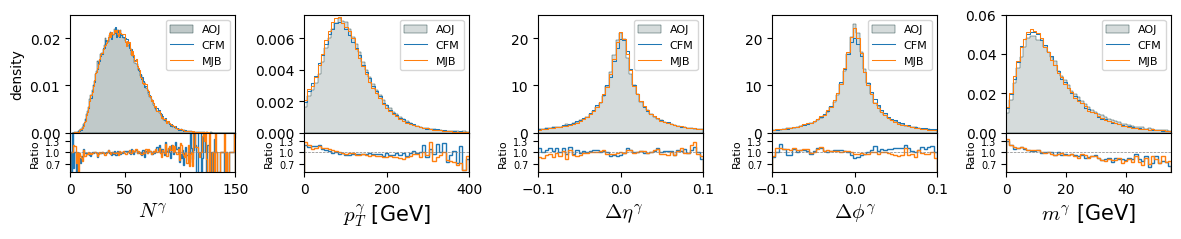

{'pt': [3.078723207578936, 5.133499679319241],
 'eta': [0.0014444541799960055, 0.0018463827968522974],
 'phi': [0.0011518911211300317, 0.0014137228813129832],
 'm': [1.1404217731999455, 1.164419477465127],
 'N': [0.3357900000000009, 0.2876500000000002]}

In [8]:
results('photon')

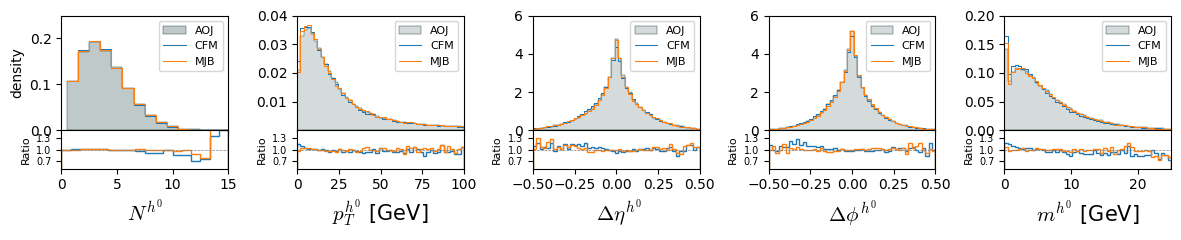

{'pt': [0.8483274433150916, 0.30640786014705795],
 'eta': [0.00480091971964864, 0.004365234474710828],
 'phi': [0.0042808260856741845, 0.0019720674201893357],
 'm': [0.46588838125203963, 0.1524079978153027],
 'N': [0.0707500000000002, 0.01795000000000016]}

In [9]:
results('h0')

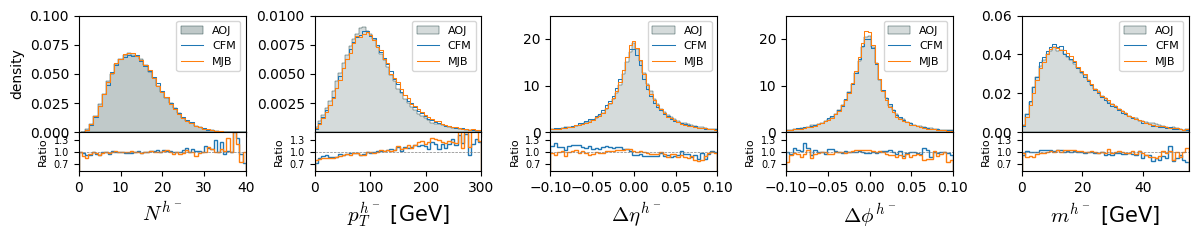

{'pt': [4.10098305462984, 5.914923635705851],
 'eta': [0.0027861897420894616, 0.0023335579592544944],
 'phi': [0.0008237117988879433, 0.002147740664322459],
 'm': [0.5700457321480337, 0.26020977705344456],
 'N': [0.15459999999999957, 0.04766000000000012]}

In [10]:
results('h-')


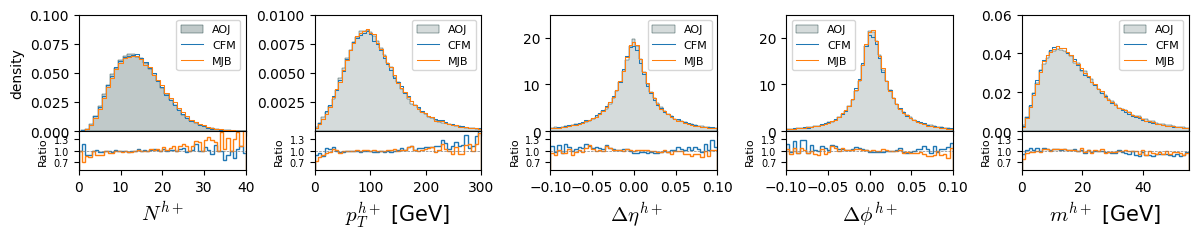

{'pt': [2.208868087464875, 1.0164062503871403],
 'eta': [0.001507817056507105, 0.0019610861830792847],
 'phi': [0.0009458530480750785, 0.0012519469067214957],
 'm': [0.5658251088322216, 0.24794043979371216],
 'N': [0.09537999999999958, 0.41068999999999967]}

In [11]:
results('h+')

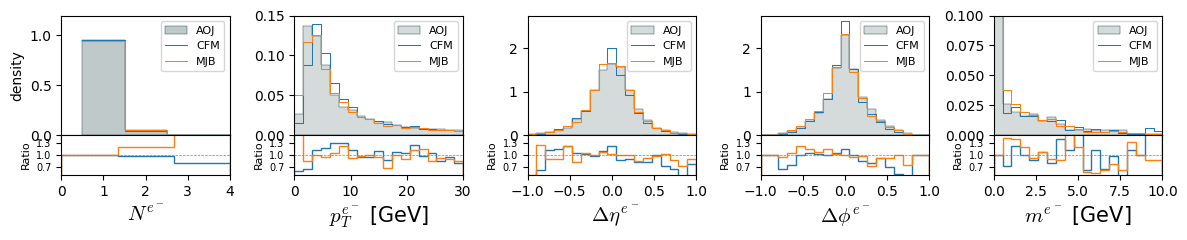

{'pt': [0.18076229254297857, 0.2287316084304441],
 'eta': [0.02621758029429845, 0.009712272290707435],
 'phi': [0.0025516236695642134, 0.0014719169587908247],
 'm': [0.00439005003356967, 0.002687282635642081],
 'N': [0.009239999999999915, 0.007769999999999944]}

In [12]:
results('e-')

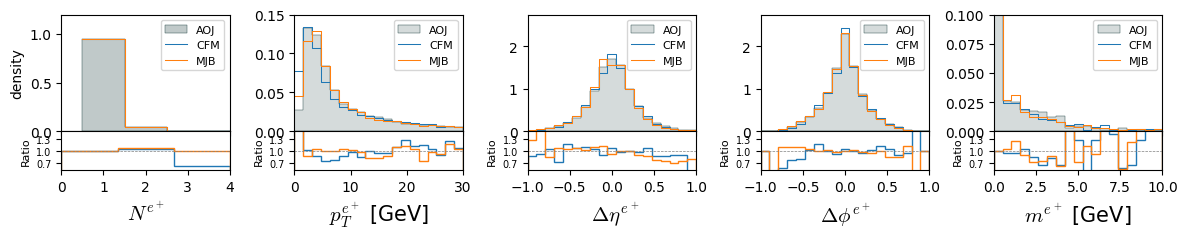

{'pt': [0.10331114318644902, 0.27501628355547236],
 'eta': [0.010349317630643541, 0.022075931476718994],
 'phi': [0.0030665237032077575, 0.0011061586340031873],
 'm': [0.0028917932720413635, 0.002033712168434279],
 'N': [0.005170000000000008, 0.006139999999999812]}

In [13]:
results('e+')

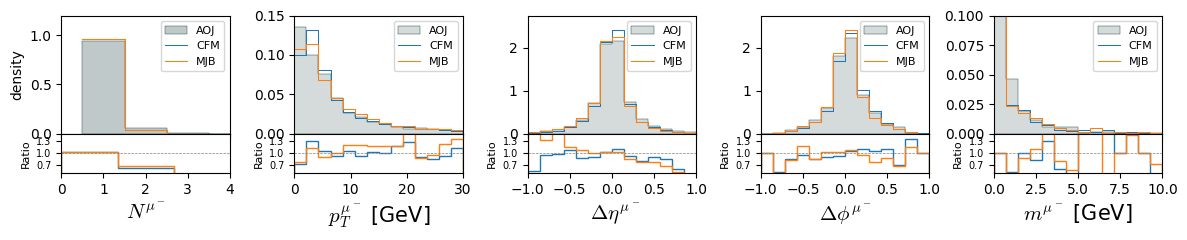

{'pt': [0.04050224575612346, 0.32195057798922333],
 'eta': [0.017068905100024838, 0.03239177885734751],
 'phi': [0.0010793378924003239, 0.002410880269857371],
 'm': [0.0011472665864545885, 0.0026546338147239805],
 'N': [0.0023600000000000287, 0.02014999999999989]}

In [150]:
results('mu-')

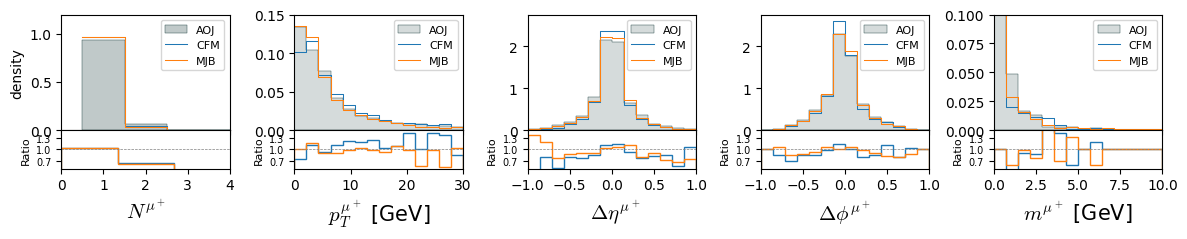

{'pt': [0.036950176908991744, 0.09471214613735944],
 'eta': [0.03068265452582814, 0.01481040691467118],
 'phi': [0.0032255729606637845, 0.0011989464915728235],
 'm': [0.001523787368371878, 0.0012014657227464615],
 'N': [0.007659999999999889, 0.01104000000000005]}

In [15]:
results('mu+')